## FINAL PROJECT

**DONG**

#### TASK 1

Problem Definition and Dataset Selection

    Choose a real-world problem to solve using AI or machine learning. This could be a classification, regression, clustering, or time-series forecasting task.
    Example Problem Areas:
        Predicting rare medical conditions (regression or classification).
        Classifying satellite images (classification).
        Detecting fraudulent online activity (anomaly detection).
        Predicting equipment failure based on sensor data (time-series forecasting).
    Select an dataset using repositories like:
        Kaggle
        UCI Machine Learning Repository
        Google Dataset Search
    Ensure that the dataset is clean, preprocessed, and suitable for your chosen model. The data should present a real-world challenge, so you should be able to justify the problem and the importance of solving it.

For thsi project, we have chossen the **Pima Indians Diabetes Database**.

This dataset consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome.



In [143]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import kagglehub
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import make_classification


In [144]:
# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

# Load the CSV file into a DataFrame
# The dataset is typically named 'diabetes.csv'
df = pd.read_csv(os.path.join(path, 'diabetes.csv'))

In [145]:
df.shape

(768, 9)

In [146]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In Outcome column, the number '1' indicates that the person has diabetes while '0' is a sign of no diabetes.

In [147]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### TASK 2  Data Preprocessing and Exploration

    Load the dataset and explore it thoroughly.
    Handle any missing values, outliers, and preprocess the data (e.g., normalization, encoding categorical variables).
    Visualize relationships in the data using charts and graphs to better understand the patterns.
    Split the data into training and testing sets for model evaluation.
    Use Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn for data preprocessing and visualization.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The Dataset is clean, all the column are numerical type.

In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


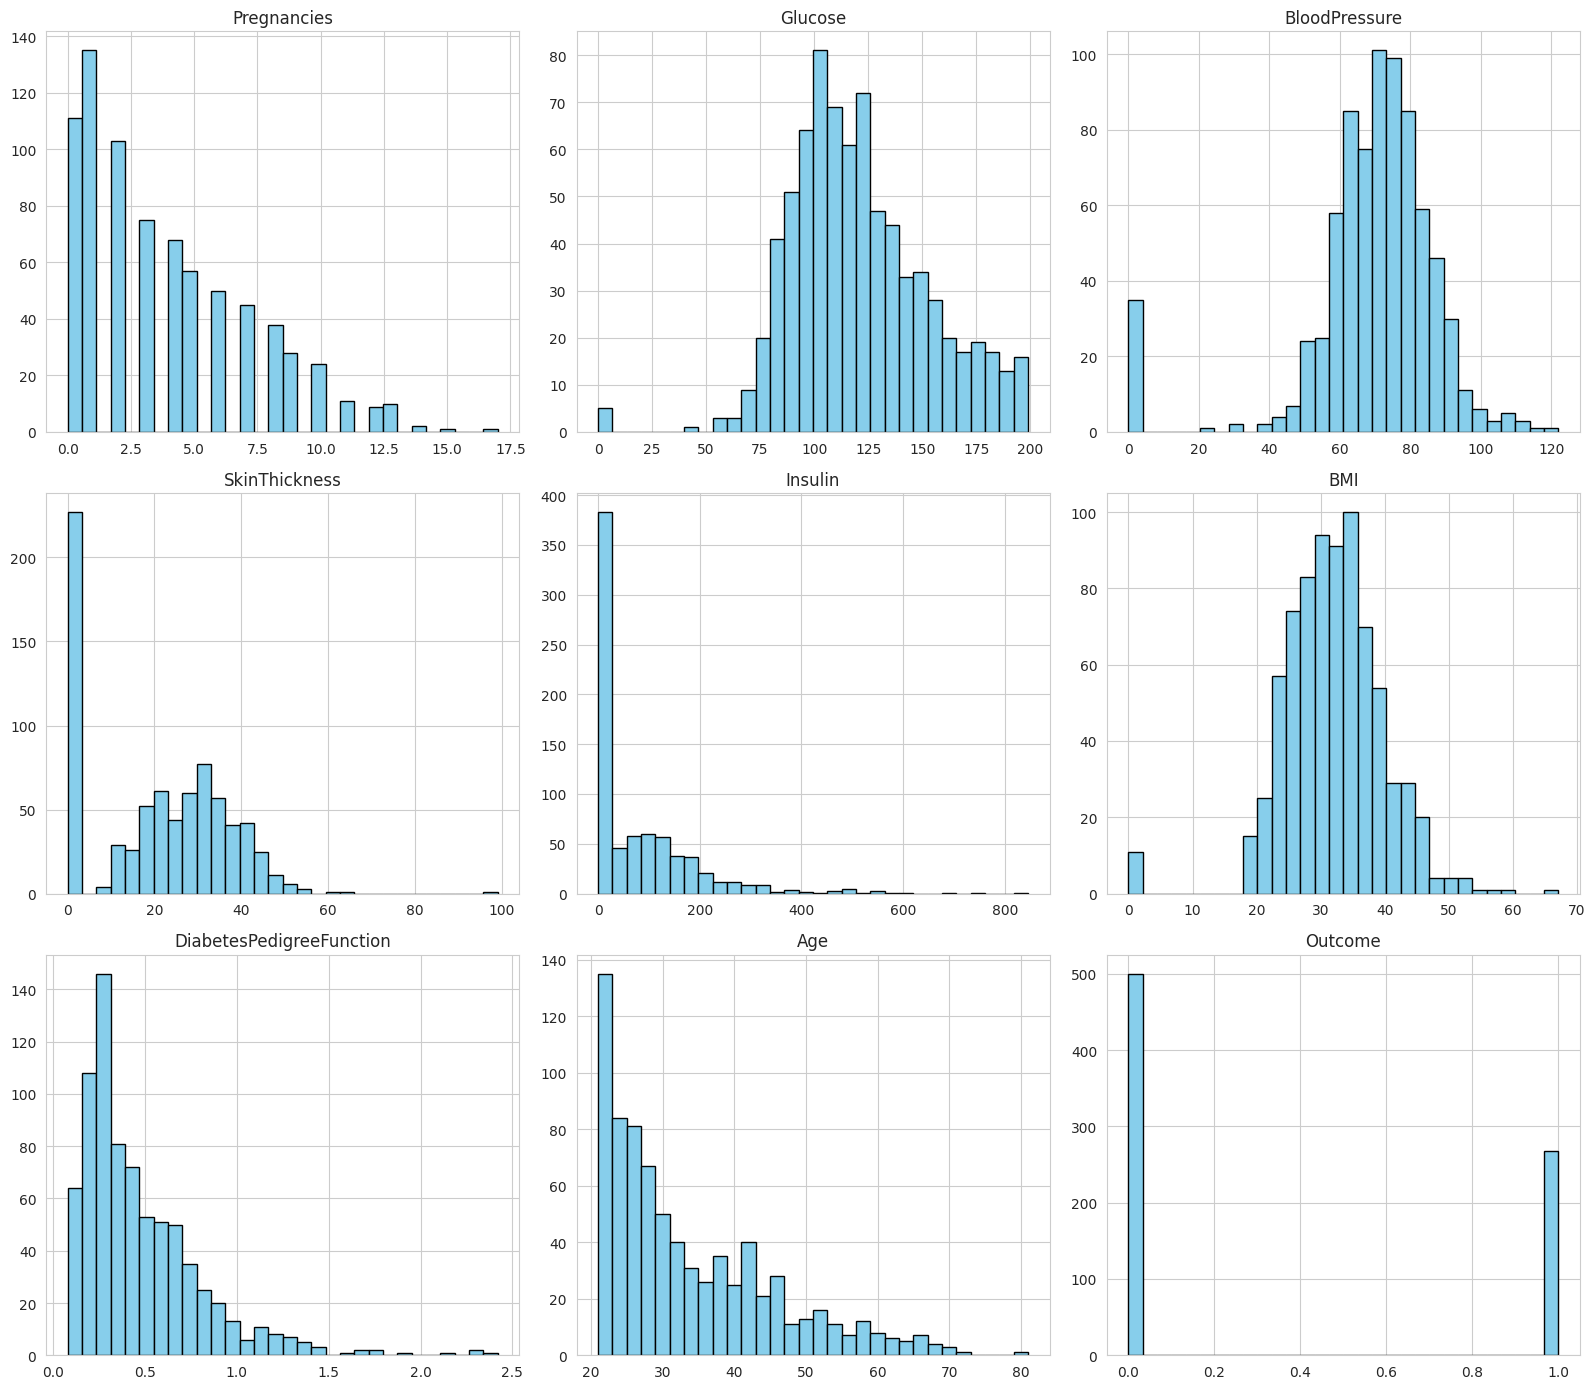

In [151]:
df.hist(figsize=(16, 14),bins=30,color="skyblue",edgecolor="black")
plt.subplots_adjust(hspace=0.7,wspace=0.4)
plt.tight_layout()
plt.show()


**EXPLANATIONS**

**Pregnancies**: This distribution is heavily skewed to the right, with the highest frequency at 0 or 1 pregnancy. The number of individuals decreases sharply with an increasing number of pregnancies. This is typical for pregnancy counts in a general population.

**Glucose**: The glucose distribution appears roughly bell-shaped, but with a slight right skew. The peak is around 100-120, which suggests a normal blood glucose level for a majority of the individuals. There are also some individuals with very low glucose levels (near 0, which might indicate missing values or specific conditions) and some with higher levels.

**BloodPressure**: This distribution is somewhat symmetric, resembling a normal distribution, with its peak around 70-80. There's a noticeable bar at 0, which likely represents missing or unrecorded blood pressure values, as a blood pressure of 0 is medically impossible. There are also individuals with higher blood pressure values.

**SkinThickness**: This histogram is heavily skewed to the right, with a large number of individuals having a skin thickness of 0. Similar to blood pressure, a skin thickness of 0 is physiologically unlikely and points to missing or unrecorded data. For individuals with non-zero skin thickness, the distribution is spread out with decreasing frequency as skin thickness increases.

**Insulin**: This distribution is extremely skewed to the right. A very large number of individuals have an insulin level of 0, which again suggests missing data. For the non-zero values, the distribution tails off very quickly, indicating that most individuals with recorded insulin have relatively low levels.

**BMI**: The Body Mass Index distribution appears somewhat symmetric, with a slight right skew. The peak is around 30-35, which falls into the overweight to obese category. There's also a bar at 0, which is likely missing data, as a BMI of 0 is impossible.

**DiabetesPedigreeFunction**: This distribution is heavily skewed to the right, with most values concentrated at the lower end (around 0.0 to 0.5). There's a long tail extending towards higher values. This suggests that most individuals have a low genetic predisposition score for diabetes according to this function, with fewer individuals having a higher score.

**Age:** The age distribution appears to be right-skewed as well, though less severely than DiabetesPedigreeFunction. The majority of individuals are in their 20s and 30s, with counts decreasing as age increases. There are a few individuals in their 70s and 80s.

**Outcome:** This is a binary variable, likely representing the presence or absence of diabetes (0 for no diabetes, 1 for diabetes). The histogram clearly shows an imbalanced dataset, with a significantly larger number of instances for Outcome = 0 (no diabetes) compared to Outcome = 1 (diabetes). Approximately 500 individuals do not have diabetes, while around 270-280 individuals do.

The plot can be done by either seaborn or Matplotlib.
The other method is in comments.
Generating scatter plots for features vs 'Outcome'...


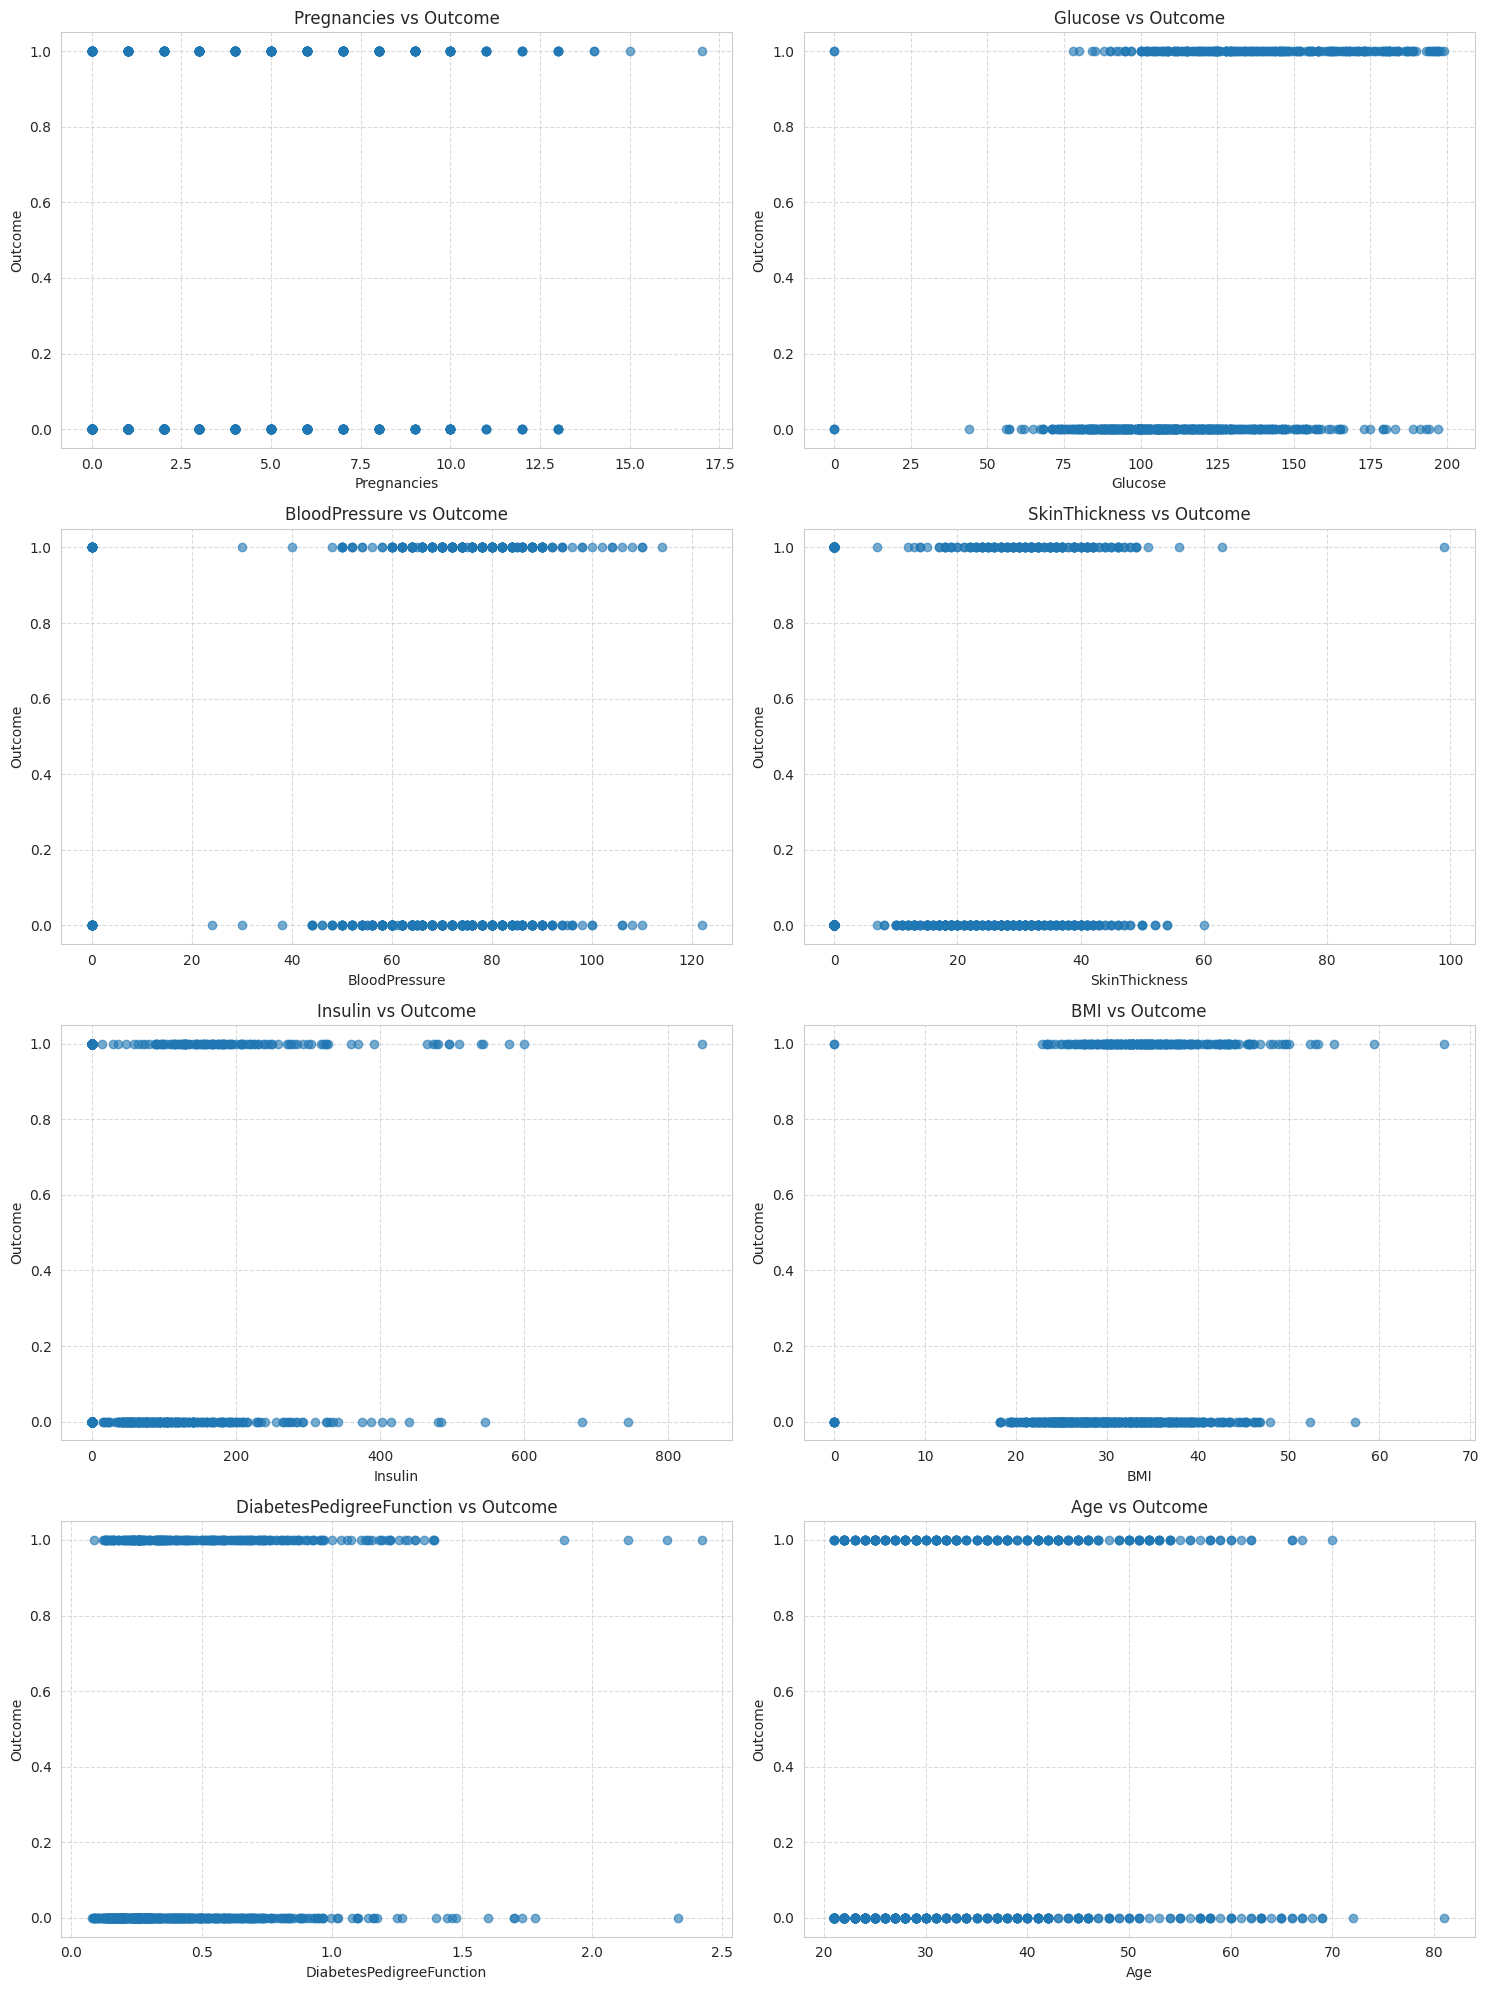

In [152]:
# 4.3 Create a function to automate scatter plots for all features vs Outcome.

print("The plot can be done by either seaborn or Matplotlib.\nThe other method is in comments.")

def Scatter_Features_vs_Outcome(DF, Target='Outcome'):

    features = DF.drop(Target, axis=1)  # All columns except target
    target = DF[Target]

    # Calculate number of subplots needed
    n_features = len(features.columns)
    n_cols = 2  # Number of columns in subplot grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Create scatter plot for each feature
    print(f"Generating scatter plots for features vs '{Target}'...")
    for i, feature in enumerate(features.columns):
        axes[i].scatter(features[feature], target, alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(Target)
        axes[i].set_title(f'{feature} vs {Target}')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

Scatter_Features_vs_Outcome(df)



In [153]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [154]:
#Data splitting
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  **Model Selection and Development**

    Based on the type of problem (classification, regression, etc.), select an appropriate model (e.g., decision trees, random forests, support vector machines, etc.).
    You may experiment with both supervised and unsupervised learning models, depending on your task.
    Train your selected model using the training data.
    Ensure your model is well-optimized and perform hyperparameter tuning to improve its performance.
    Use cross-validation where applicable to evaluate the model's robustness.

Given that the outcome of this problem is a binary choice (either having diabetes or not), we can definitively state that it is a classification problem. Consequently, various classification models can be employed to tackle such a problem, including Logistic Regression, Decision Trees, and Random Forests. For this dataset, we will implement Logistic Regression and Decision Trees, then compare their performance.

In [155]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [156]:
model1.fit(X_train, y_train)


LogisticRegression()

In [157]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint # For sampling distributions

# Define parameter distributions (instead of a fixed grid)
param_distributions_dt = {
    'max_depth': randint(3, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV (n_iter is number of random combinations to try)
random_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions_dt,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='recall', # Optimize for recall for diabetes detection
    random_state=42
)
random_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best cross-validation score (recall):", random_search_dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8}
Best cross-validation score (recall): 0.7513842746400886


Model Evaluation and Optimization

    Evaluate your model using the test set and appropriate performance metrics (e.g., accuracy, precision, recall, RMSE, AUC, etc.).
    Tune your model for optimal performance using techniques like grid search, random search, and feature selection.
    If applicable, implement techniques such as regularization (L1/L2) or dropout to improve model generalization.

In [134]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [135]:
report1 = classification_report(y_test, y_pred1)
print("Classification Report for Logistic regression:\n", report1)

Classification Report for Logistic regression:
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        99
         1.0       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [136]:
report2 = classification_report(y_test, y_pred2)
print("Classification Report for Decision Trees:\n", report2)

Classification Report for Decision Trees:
               precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        99
         1.0       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [137]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

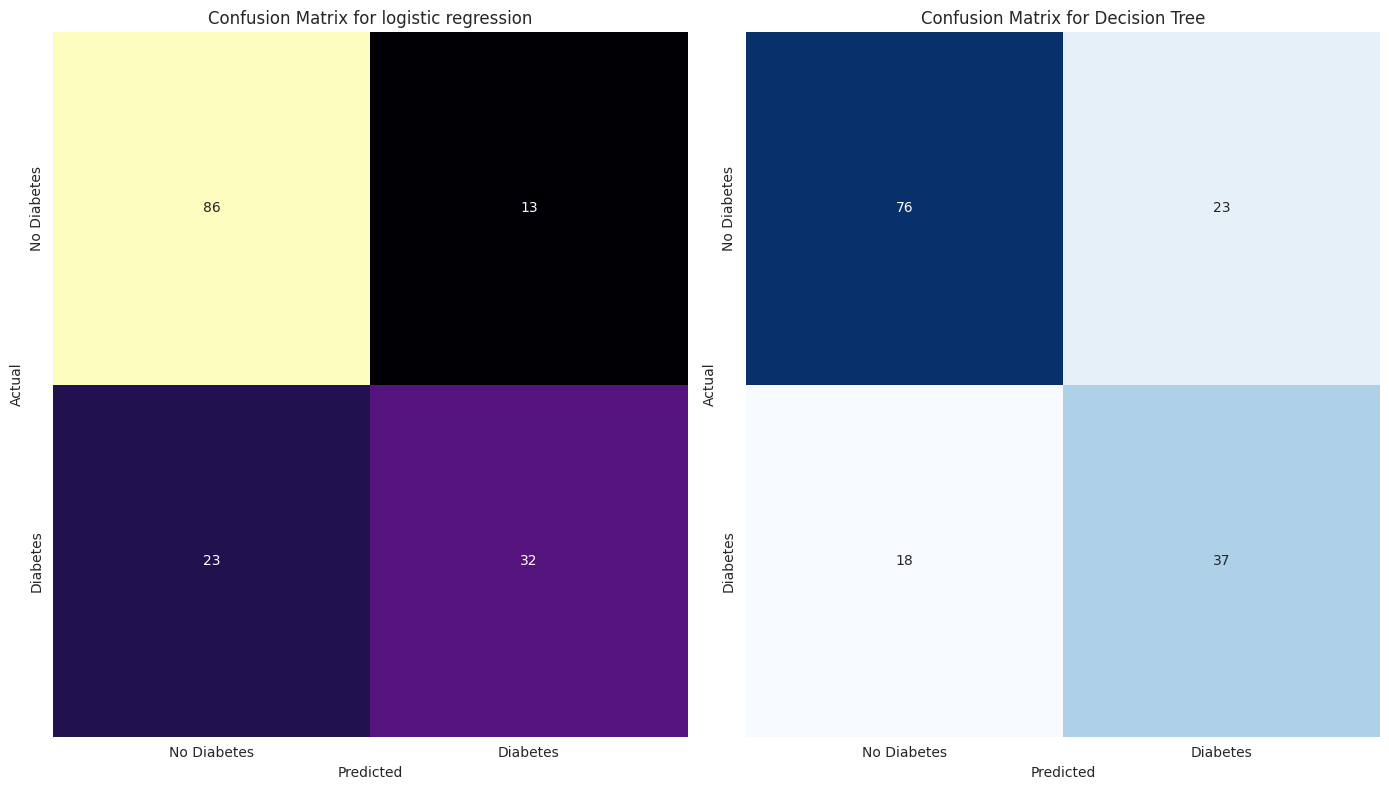

In [138]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In a comparison between Logistic Regression and a Decision Tree model, Logistic Regression achieved a slightly higher overall accuracy of 77% compared to the Decision Tree's 75%.

However, the Decision Tree excels in identifying actual diabetes cases, with a 67% recall rate versus Logistic Regression's 58%. This means the Decision Tree is better at avoiding missed diagnoses. Conversely, Logistic Regression shows stronger performance for non-diabetes cases and offers better precision for diabetes detection (0.71 vs. 0.64).

The choice between models depends on the application's priorities:

The Decision Tree is recommended due to its ability to minimize missed diabetes cases, which is often a more critical factor than overall accuracy in healthcare.

For general prediction tasks where overall accuracy is paramount, Logistic Regression will be the preferred choice.

Ultimately, both models perform reasonably well, and the decision hinges on whether the goal is to prevent missed diagnoses (favoring Decision Tree) or to maximize overall predictive accuracy (favoring Logistic Regression).

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV (cv=5 for 5-fold cross-validation)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='recall') # Optimize for recall
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score (recall):", grid_search_lr.best_score_)
# Use grid_search_lr.best_estimator_ for predictions on the test set

Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best cross-validation score (recall): 0.5497231450719823


In [140]:

# Initialize models
log_reg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# AUC-ROC
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probability of the positive class
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

--- Evaluation for Logistic Regression ---
Accuracy: 0.7662
Precision (Diabetes): 0.7111
Recall (Diabetes): 0.5818
F1-Score (Diabetes): 0.6400
AUC: 0.8129

Confusion Matrix (Logistic Regression):
 [[86 13]
 [23 32]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

Non-Diabetes       0.79      0.87      0.83        99
    Diabetes       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154


--- Evaluation for Decision Tree ---
Accuracy: 0.7468
Precision (Diabetes): 0.6250
Recall (Diabetes): 0.7273
F1-Score (Diabetes): 0.6723
AUC: 0.7424

Confusion Matrix (Decision Tree):
 [[75 24]
 [15 40]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

Non-Diabetes       0.83      0.76      0.79        99
    Diabetes       0.62      0.73      0.67        55



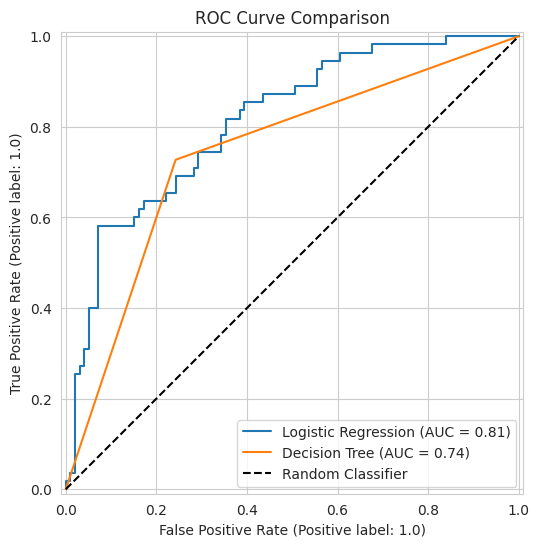

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay # For plotting ROC


# --- Assuming X_test, y_test, y_pred_log_reg, y_pred_dt, y_prob_log_reg, y_prob_dt are already defined from previous steps ---

print("--- Evaluation for Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision (Diabetes): {precision_score(y_test, y_pred_log_reg, pos_label=1):.4f}") # pos_label=1 assumes 1 is the diabetes class
print(f"Recall (Diabetes): {recall_score(y_test, y_pred_log_reg, pos_label=1):.4f}")
print(f"F1-Score (Diabetes): {f1_score(y_test, y_pred_log_reg, pos_label=1):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_log_reg):.4f}")

print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetes', 'Diabetes']))


print("\n--- Evaluation for Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (Diabetes): {precision_score(y_test, y_pred_dt, pos_label=1):.4f}")
print(f"Recall (Diabetes): {recall_score(y_test, y_pred_dt, pos_label=1):.4f}")
print(f"F1-Score (Diabetes): {f1_score(y_test, y_pred_dt, pos_label=1):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_dt):.4f}")

print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=['Non-Diabetes', 'Diabetes']))


# Optional: Plotting ROC Curves for visual comparison
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, ax=plt.gca(), name="Logistic Regression")
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=plt.gca(), name="Decision Tree")
plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend()
plt.show()

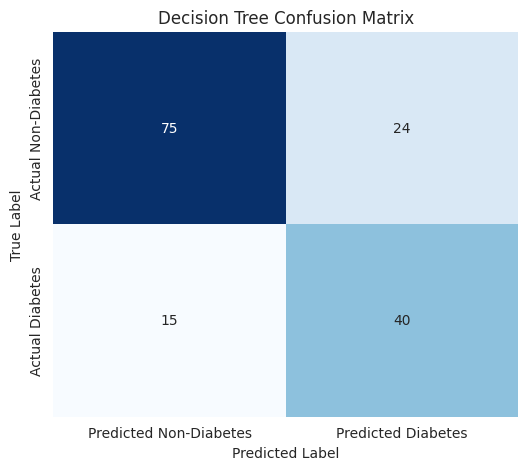


**Interpretation of Confusion Matrix:**
Upper-left (TN): Correctly predicted non-diabetes cases.
Upper-right (FP): Incorrectly predicted diabetes (False Alarms).
Lower-left (FN): Missed diabetes cases (Most critical for this application).
Lower-right (TP): Correctly predicted diabetes cases.


<Figure size 800x600 with 0 Axes>

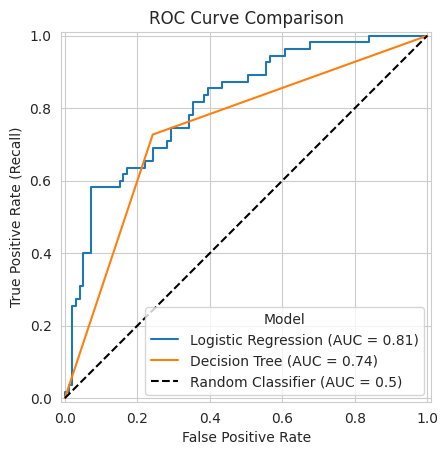


**Interpretation of ROC Curve:**
The ROC curve illustrates the trade-off between True Positive Rate (Recall) and False Positive Rate at various classification thresholds. A curve closer to the top-left corner indicates better performance. The Area Under the Curve (AUC) summarizes this performance, with higher AUC indicating better discrimination between classes.


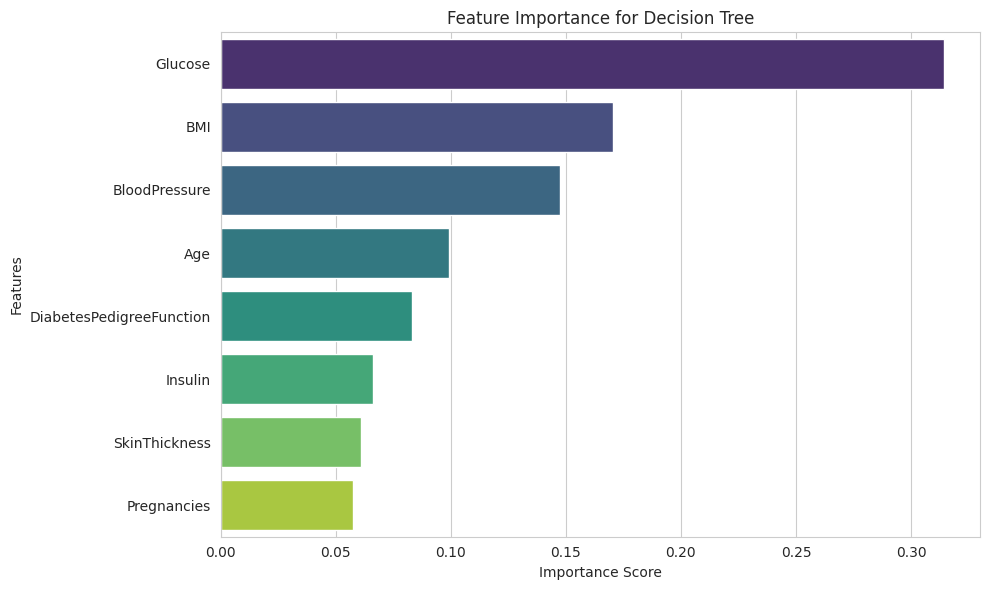


**Feature Importance for Decision Tree:**
This chart shows which features the Decision Tree model considered most important for making its predictions. Higher bars indicate greater influence.
Glucose                     0.314225
BMI                         0.170700
BloodPressure               0.147679
Age                         0.099215
DiabetesPedigreeFunction    0.083282
Insulin                     0.066253
SkinThickness               0.061164
Pregnancies                 0.057482
dtype: float64


In [142]:
# Set plot style
sns.set_style("whitegrid")

# --- 1. Confusion Matrix Visualization (Decision Tree) ---
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Non-Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual Non-Diabetes', 'Actual Diabetes'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n**Interpretation of Confusion Matrix:**")
print("Upper-left (TN): Correctly predicted non-diabetes cases.")
print("Upper-right (FP): Incorrectly predicted diabetes (False Alarms).")
print("Lower-left (FN): Missed diabetes cases (Most critical for this application).")
print("Lower-right (TP): Correctly predicted diabetes cases.")


# --- 2. ROC Curve Comparison ---
plt.figure(figsize=(8, 6))
roc_display_lr = RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, name="Logistic Regression")
roc_display_dt = RocCurveDisplay.from_estimator(dt_model, X_test, y_test, name="Decision Tree", ax=roc_display_lr.ax_)

plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(title='Model')
plt.grid(True)
plt.show()

print("\n**Interpretation of ROC Curve:**")
print("The ROC curve illustrates the trade-off between True Positive Rate (Recall) and False Positive Rate at various classification thresholds. A curve closer to the top-left corner indicates better performance. The Area Under the Curve (AUC) summarizes this performance, with higher AUC indicating better discrimination between classes.")


# --- 3. Feature Importance (Decision Tree) ---
if hasattr(dt_model, 'feature_importances_'):
    # Use the columns from the original scaled DataFrame
    feature_importances = pd.Series(dt_model.feature_importances_, index=df_scaled.drop('Outcome', axis=1).columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
    plt.title('Feature Importance for Decision Tree')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

    print("\n**Feature Importance for Decision Tree:**")
    print("This chart shows which features the Decision Tree model considered most important for making its predictions. Higher bars indicate greater influence.")
    print(feature_importances)